In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Dict
import pandas as pd
import numpy as np
import os

In [3]:
DATASET_FOLDER = './dataset/'
TRAIN_FILE = 'train.csv'
IMAGE_FOLDER = "./imgs/"

In [4]:
trainData = pd.read_csv(os.path.join(DATASET_FOLDER, TRAIN_FILE))

In [5]:
print(trainData.columns)
trainData.head()

Index(['image_link', 'group_id', 'entity_name', 'entity_value'], dtype='object')


,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [6]:
trainData['datapoint_id'] = trainData.index

## Assigning Images an ID

In [13]:
imageMap : Dict[str, int] = { image : id for id, image in enumerate(trainData['image_link'].unique()) }
trainData['image_id'] = trainData['image_link'].map(lambda x : imageMap.get(x, -1))

In [14]:
from src.image import Image

In [20]:
index = 75350
sampleImage = Image(trainData['image_link'][index], trainData['image_id'][index])

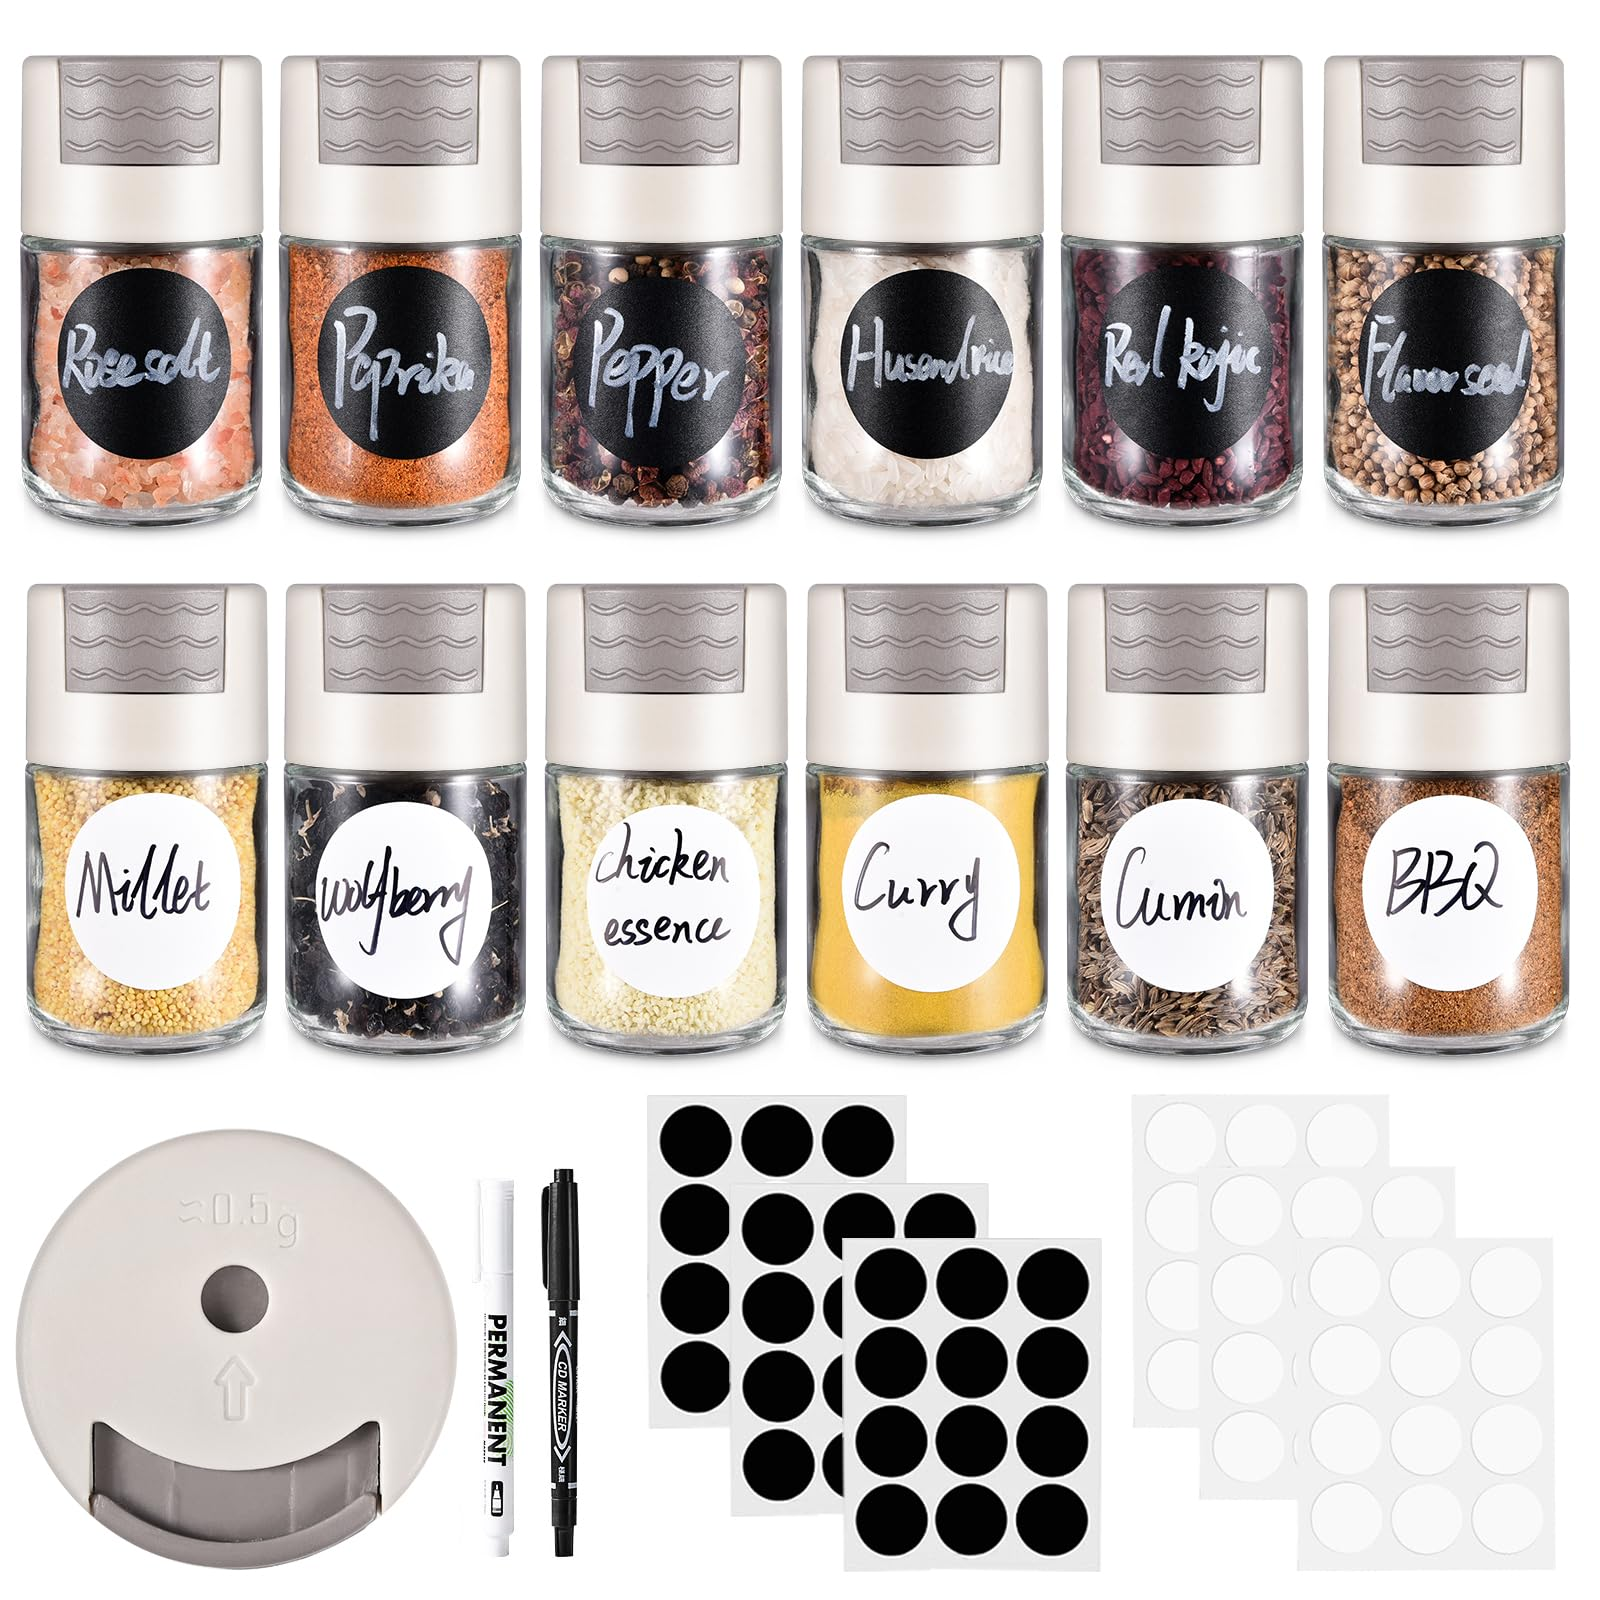

In [21]:
sampleImage.getImage()

In [22]:
print(sampleImage.readTextFrom())

°
m
o

S


